<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Differential_Algebra_for_TD_Schrodinger_Eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is an attempt at applying differential geometric algebra to the time-dependent Schrodinger equation.

| **Section** | **Description** |
|------------|----------------|
| **1. Differential Geometric Algebra Formulation of TDSE** | The Schrödinger equation can be framed using **Clifford algebra representations**. The TDSE in its standard form is:  <br> <br> $$[ i\hbar \frac{\partial}{\partial t} \psi(x,t) = \hat{H} \psi(x,t) ]$$ <br> where: <br> $$\psi(x,t)$$ is the wavefunction. <br> $$\hat{H} = -\frac{\hbar^2}{2m} \nabla^2 + V(x)$$ is the Hamiltonian operator. <br> $$V(x)$$ is the potential energy. <br> <br> Using **geometric algebra**, we represent the wavefunction $$\psi$$ as a **multivector-valued function** (which allows spinor-based or bivector-based descriptions). |
| **2. Numerical Approach Using Python** | Implement **Crank-Nicholson method** or **Split-Step Fourier Method** to numerically solve the TDSE. <br> <br> **Implementation Plan:** <br> - Use **Clifford Algebra (GA)** via `clifford` Python package. <br> - Solve the **free-particle Schrödinger equation** in 1D using **finite difference methods**. <br> - Extend to a potential well. |
| **3. Explanation of the Code** | - **Hamiltonian Construction**: Discretize the Laplacian operator using finite difference methods. <br> - **Initial Wave Packet**: A Gaussian wave packet is used as the initial wavefunction. <br> - **Crank-Nicholson Scheme**: The TDSE is solved iteratively using a sparse linear solver. <br> - **Visualization**: The probability density $$|\psi(x,t)|^2$$ is plotted over time. |
| **4. Extending to Geometric Algebra** | - Using Clifford algebra libraries like `clifford` or `galgebra`, we can represent **wavefunctions as spinors**. <br> - Replace traditional complex number operations with **multivector-valued wavefunctions**. <br> <br> This approach provides a deeper connection between quantum mechanics and differential geometry while still maintaining computational efficiency. |


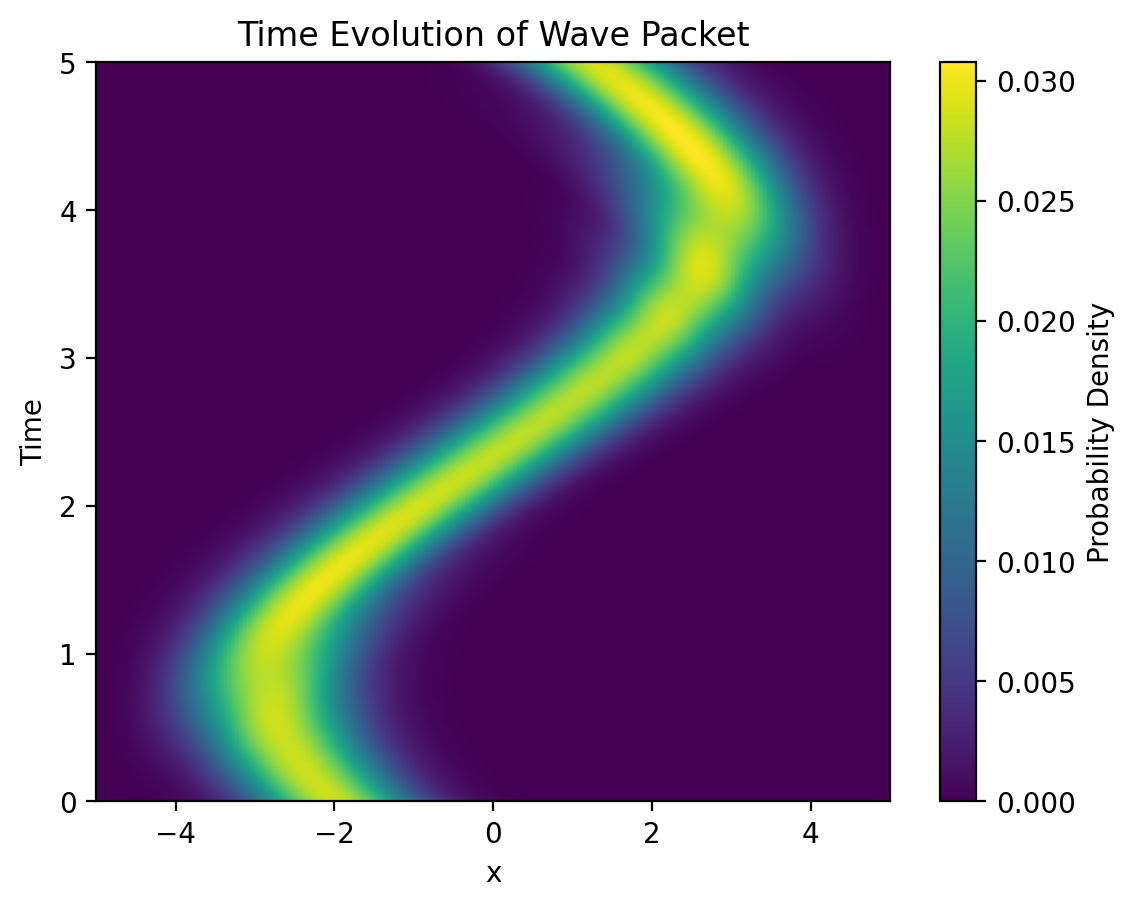

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at the beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Define constants
hbar = 1.0   # Reduced Planck's constant (set to 1 for simplicity)
m = 1.0      # Particle mass
Nx = 200     # Number of spatial points
Lx = 10.0    # Length of the spatial domain
x = np.linspace(-Lx/2, Lx/2, Nx)  # Spatial grid
dx = x[1] - x[0]  # Grid spacing
dt = 0.01    # Time step
Nt = 500     # Number of time steps

# Define potential (e.g., harmonic oscillator)
V = 0.5 * m * (x**2)

# Define the Hamiltonian using finite differences
laplacian_diagonal = -2.0 * np.ones(Nx)
laplacian_off_diagonal = np.ones(Nx - 1)
T = (-hbar**2 / (2 * m * dx**2)) * diags(
    [laplacian_off_diagonal, laplacian_diagonal, laplacian_off_diagonal],
    offsets=[-1, 0, 1], format='csc')
V_matrix = diags(V, format='csc')
H = T + V_matrix  # Total Hamiltonian

# Initial wave packet
sigma = 1.0  # Width of Gaussian packet
x0 = -2.0    # Initial position
p0 = 2.0     # Initial momentum
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * p0 * x / hbar)
psi0 /= np.linalg.norm(psi0)  # Normalize

# Crank-Nicholson Method for Time Evolution
I = diags(np.ones(Nx), format='csc')
A = I - 1j * dt / (2 * hbar) * H
B = I + 1j * dt / (2 * hbar) * H

psi = psi0.copy()
time_evolution = []
for t in range(Nt):
    psi = spsolve(A, B @ psi)  # Solve the linear system
    time_evolution.append(np.abs(psi)**2)  # Store probability density

# Plot results
plt.imshow(time_evolution, aspect='auto', extent=[x[0], x[-1], 0, Nt*dt], origin='lower')
plt.colorbar(label='Probability Density')
plt.xlabel('x')
plt.ylabel('Time')
plt.title('Time Evolution of Wave Packet')
plt.show()


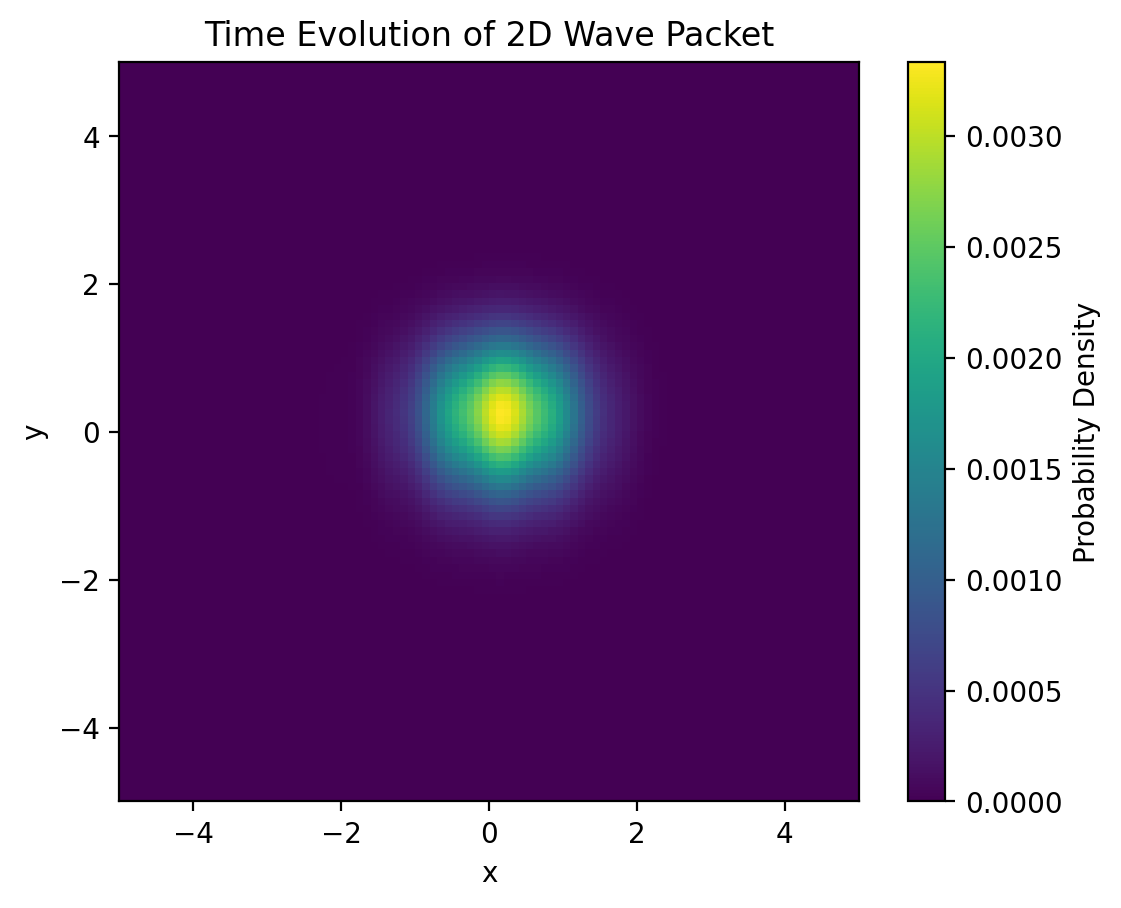

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Define constants
hbar = 1.0   # Reduced Planck's constant (set to 1 for simplicity)
m = 1.0      # Particle mass
Nx, Ny = 100, 100  # Number of spatial points in x and y
Lx, Ly = 10.0, 10.0  # Length of the spatial domain
x = np.linspace(-Lx/2, Lx/2, Nx)  # Spatial grid in x
y = np.linspace(-Ly/2, Ly/2, Ny)  # Spatial grid in y
dx, dy = x[1] - x[0], y[1] - y[0]  # Grid spacing
dt = 0.01    # Time step
Nt = 500     # Number of time steps

# Define potential (e.g., harmonic oscillator in 2D)
X, Y = np.meshgrid(x, y, indexing='ij')
V = 0.5 * m * (X**2 + Y**2)

# Define the Hamiltonian using finite differences
laplacian_diagonal = -4.0 * np.ones(Nx * Ny)
laplacian_off_diagonal = np.ones(Nx * Ny - 1)
laplacian_off_diagonal2 = np.ones(Nx * Ny - Nx)

T_x = (-hbar**2 / (2 * m * dx**2)) * diags(
    [laplacian_off_diagonal, laplacian_diagonal, laplacian_off_diagonal],
    offsets=[-1, 0, 1], format='csc')
T_y = (-hbar**2 / (2 * m * dy**2)) * diags(
    [laplacian_off_diagonal2, laplacian_diagonal, laplacian_off_diagonal2],
    offsets=[-Nx, 0, Nx], format='csc')
T = T_x + T_y
V_matrix = diags(V.ravel(), format='csc')
H = T + V_matrix  # Total Hamiltonian

# Initial wave packet
sigma = 1.0  # Width of Gaussian packet
x0, y0 = -2.0, -2.0  # Initial position
p0x, p0y = 2.0, 2.0  # Initial momentum
psi0 = np.exp(-(X - x0)**2 / (2 * sigma**2) - (Y - y0)**2 / (2 * sigma**2)) * \
       np.exp(1j * (p0x * X + p0y * Y) / hbar)
psi0 /= np.linalg.norm(psi0)  # Normalize

# Crank-Nicholson Method for Time Evolution
I = diags(np.ones(Nx * Ny), format='csc')
A = I - 1j * dt / (2 * hbar) * H
B = I + 1j * dt / (2 * hbar) * H

psi = psi0.ravel().copy()
time_evolution = []
for t in range(Nt):
    psi = spsolve(A, B @ psi)  # Solve the linear system
    time_evolution.append(np.abs(psi.reshape(Nx, Ny))**2)  # Store probability density

# Plot results
fig, ax = plt.subplots()
c = ax.imshow(time_evolution[-1], extent=[x[0], x[-1], y[0], y[-1]], origin='lower')
plt.colorbar(c, label='Probability Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Time Evolution of 2D Wave Packet')
plt.show()
